In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("D:/STUDY/大三下/大数据实训/class4/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#checking which are categorical columns

for feature in df.columns:
    if df[feature].dtype not in ['int64', 'float64']:    #dtype means datatype
        print(f"{feature}:{df[feature].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [5]:
#changing total charges column to float since total charges actually looks like number ;)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df = df.dropna()  #Dropping null values
df = df.drop(['customerID'], axis = 1)  #dropping customer id because it is irrelevant for modelling

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [6]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [7]:
df.head()  #To check if properly encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


<AxesSubplot:>

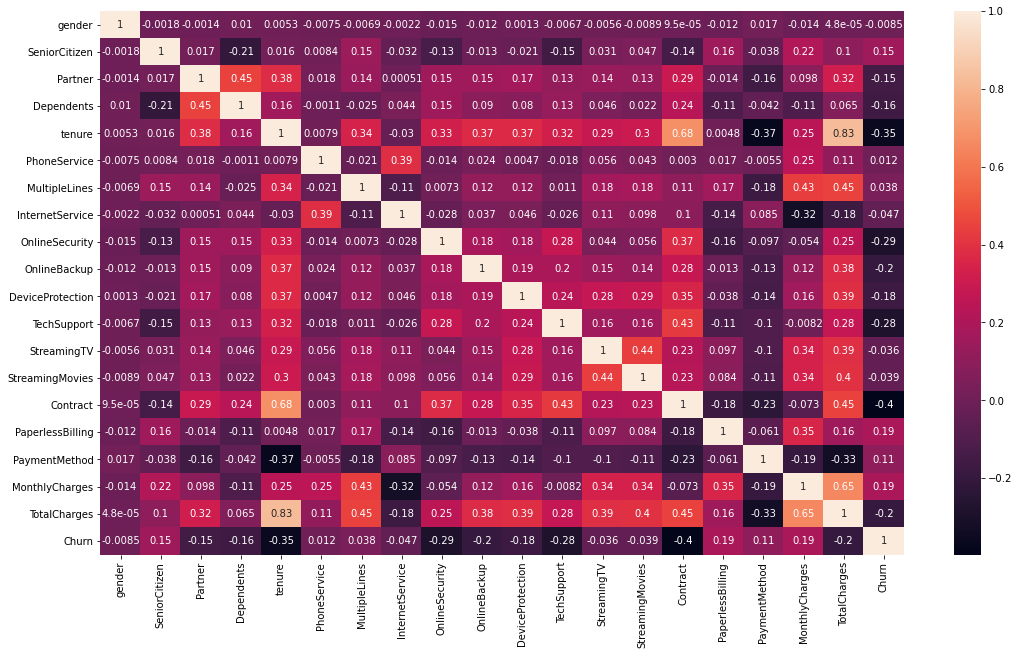

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (18,10))

sns.heatmap(df.corr(), annot =True)   #Basic correlation plot to understand which features are correlated

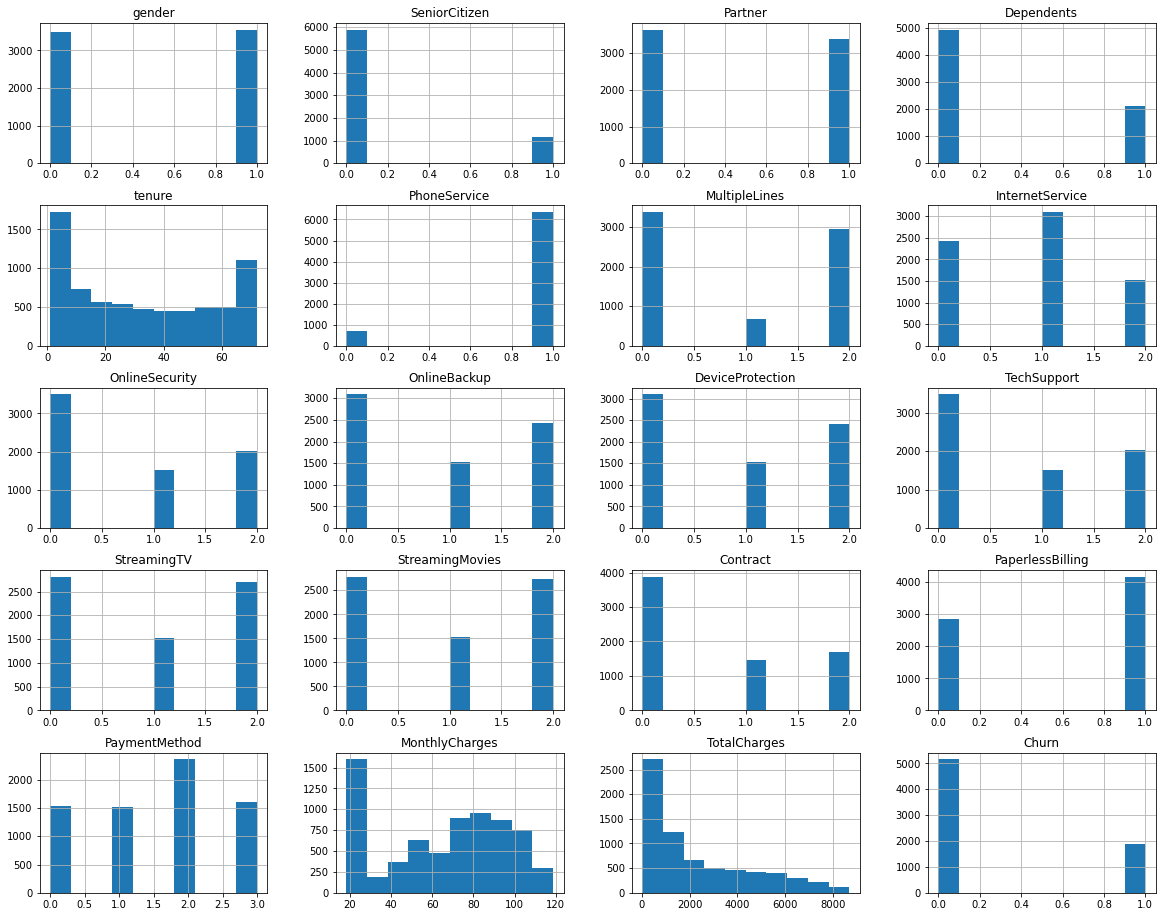

In [10]:
df.hist(figsize=(20,16))
plt.show()  #showing the charts of different columns
#This also helps in finding number of counts in each column

In [11]:
zero  = df[df['Churn']==0]   #zero values in outcome column
one = df[df['Churn']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 5000) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [12]:
zero  = df[df['PhoneService']==0]   #zero values in outcome column
one = df[df['PhoneService']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(zero, replace = True, n_samples = 6000) 
#concatenate
df = pd.concat([one, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

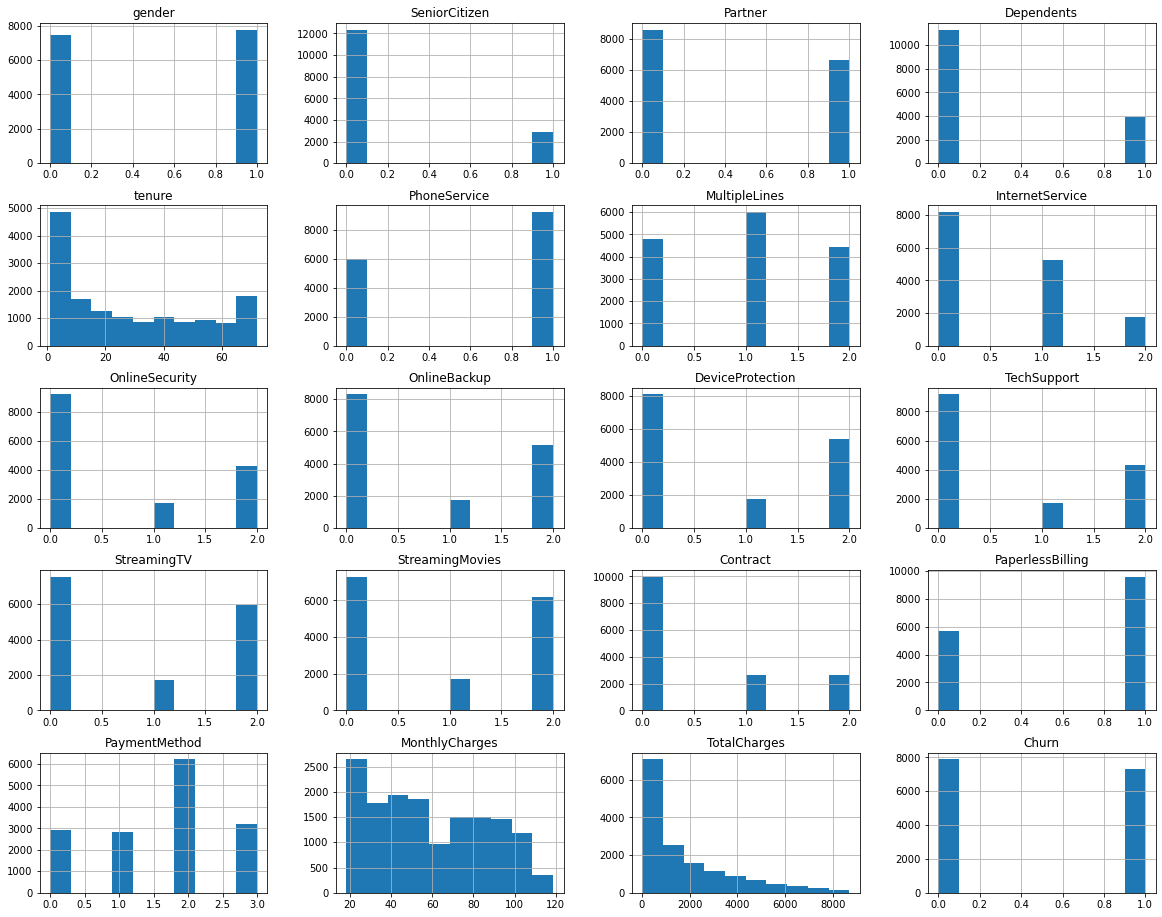

In [13]:
df.hist(figsize=(20,16))
plt.show()

In [14]:
#Checking which columns are mostly correlated with the target
df.corr().abs()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.486027
tenure              0.420737
TechSupport         0.340619
OnlineSecurity      0.339171
TotalCharges        0.261726
Dependents          0.224065
PaperlessBilling    0.209735
DeviceProtection    0.202191
OnlineBackup        0.199428
SeniorCitizen       0.163929
Partner             0.154477
MonthlyCharges      0.132090
PaymentMethod       0.131821
StreamingTV         0.060394
StreamingMovies     0.043423
MultipleLines       0.040852
PhoneService        0.034412
InternetService     0.013906
gender              0.002614
Name: Churn, dtype: float64

In [40]:
df2 = pd.read_csv("D:/STUDY/大三下/大数据实训/class4/WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer = df2.get('customerID')
X = df[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen', 'MonthlyCharges',
       'PaymentMethod', 'Partner', 'PhoneService']] #taking only relevant columns
X['customerID'] = customer
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
id_test = X_test[['customerID']]
id_test['Churn'] =  y_test
X_test = X_test.drop(['customerID'], axis = 1) 
X_train = X_train.drop(['customerID'], axis = 1) 

In [17]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')
#eval metric is auc because for classification auc metric is best
#XGBoost
#parameters for xgboost

params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}
gs_xgb =  GridSearchCV(xgb, param_grid=params_xgb, cv=5)
gs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", gs_xgb.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 800}


In [23]:
#got the best parameters above
xgb = XGBClassifier(learning_rate = 0.3, max_depth = 15, n_estimators = 800,
                    eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic', random_state = 42)
xgb.fit(X_train, y_train)
import os
import joblib
model = xgb.fit(X_train, y_train)
model_path = os.path.join('D:/STUDY/大三下/大数据实训/class4', 'xgb.pkl')
joblib.dump(model, model_path, compress=3)

['D:/STUDY/大三下/大数据实训/class4\\xgb.pkl']

In [41]:
model_path = os.path.join('D:/STUDY/大三下/大数据实训/class4', 'xgb.pkl')
model = joblib.load(model_path)
y_pred = xgb.predict(X_test)
id_test['prediction'] = y_pred
#查看预测结果
print(f"预测结果:{id_test}")

预测结果:      customerID  Churn  prediction
3813  6837-HAEVO      0           0
5845  4581-SSPWD      1           1
2255  9537-VHDTA      0           0
4140  2748-MYRVK      1           1
3738  4950-BDEUX      0           0
...          ...    ...         ...
5900  0117-LFRMW      1           1
978   6646-QVXLR      1           1
6750  2144-ESWKO      0           0
1717  0404-AHASP      0           0
354   0623-IIHUG      1           1

[3042 rows x 3 columns]


In [43]:
id_test.to_csv('D:/STUDY/大三下/大数据实训/class4/predictionRes.csv')
import boto3
from botocore.client import Config

access_key = '64ABEA89A8CFB8297072'  
secret_key = 'W0Y0ODdDN0I3MjkwNDcyQTlBODU4REE4OEMzNDRC'
host='http://scut.depts.bingosoft.net:29997'

s3 = boto3.client('s3',
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    endpoint_url=host,
   config=Config(signature_version='s3'),
    region_name='cn-north-1',)

response = s3.put_object(
    Body='D:/STUDY/大三下/大数据实训/class4/predictionRes.csv',
    Bucket='xuhang',
    Key='predictionRes.csv',
)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, \
    accuracy_score
# 准确率
accuracy_score_value = accuracy_score(y_test, y_pred)
print(f"准确率:{accuracy_score_value}")

precision_score_value = precision_score(y_test, y_pred)
print(f"精确率:{precision_score_value}")

recall_score_value = recall_score(y_test, y_pred)
print(f"召回率:{recall_score_value}")

f1_score_value = f1_score(y_test, y_pred)
print(f"f1值:{f1_score_value}")

confusion_matrix_value = confusion_matrix(y_test, y_pred)
print(f"混淆矩阵:{confusion_matrix_value}")

report = classification_report(y_test, y_pred)
print(f"分类报告:{report}")

准确率:0.9342537804076265
精确率:0.900126422250316
召回率:0.9713506139154161
f1值:0.9343832020997376
混淆矩阵:[[1418  158]
 [  42 1424]]
分类报告:              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1576
           1       0.90      0.97      0.93      1466

    accuracy                           0.93      3042
   macro avg       0.94      0.94      0.93      3042
weighted avg       0.94      0.93      0.93      3042



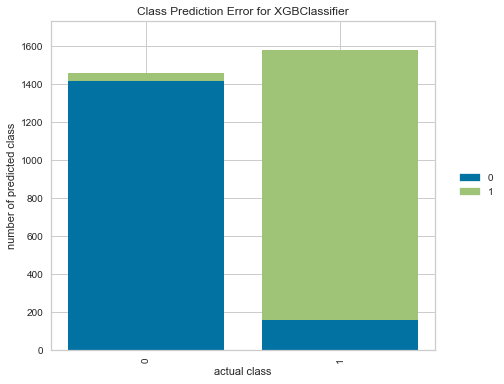

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [30]:
from yellowbrick import ROCAUC
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ConfusionMatrix, DiscriminationThreshold
from yellowbrick.model_selection import LearningCurve, CVScores, FeatureImportances, RFECV, ValidationCurve

# 分类预测
visualizer = ClassPredictionError(model)
visualizer.score(X_test, y_test)
visualizer.show()

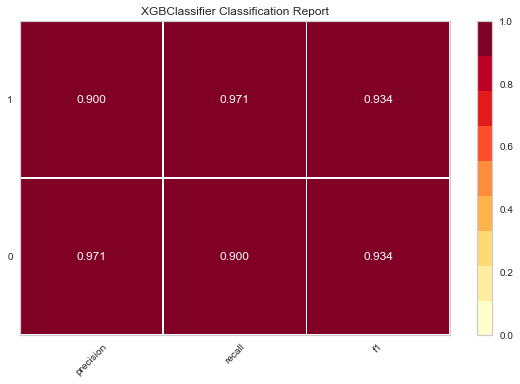

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [31]:
# 分类报告
visualizer = ClassificationReport(model)
visualizer.score(X_test, y_test)
visualizer.show()

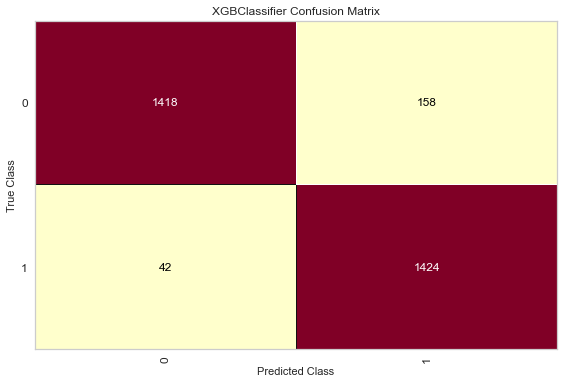

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# 混淆矩阵
visualizer = ConfusionMatrix(model)
visualizer.score(X_test, y_test)
visualizer.show()

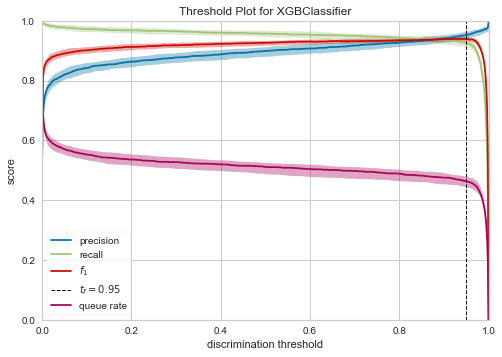

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [33]:
# 阈值选择
visualizer = DiscriminationThreshold(model)
visualizer.fit(X_train, y_train)
visualizer.show()

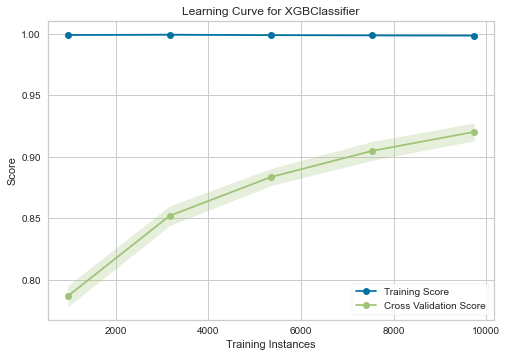

<AxesSubplot:title={'center':'Learning Curve for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [34]:
# 学习率
visualizer = LearningCurve(
    model, scoring='f1_weighted'
)
visualizer.fit(X_train, y_train)
visualizer.show()


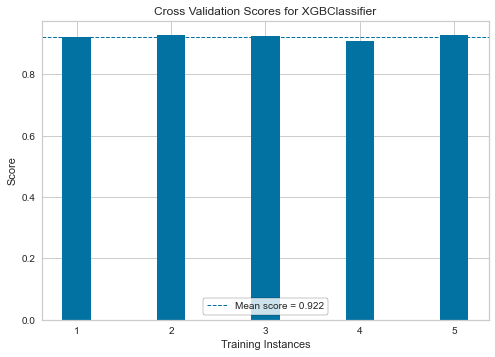

<AxesSubplot:title={'center':'Cross Validation Scores for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [35]:
# 交叉验证
visualizer = CVScores(model, cv=5, scoring='f1_weighted')
visualizer.fit(X_train, y_train)
visualizer.show()

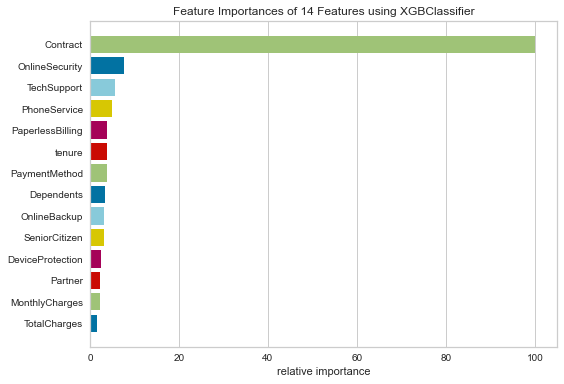

<AxesSubplot:title={'center':'Feature Importances of 14 Features using XGBClassifier'}, xlabel='relative importance'>

In [36]:
# 特征重要性
visualizer = FeatureImportances(model)
visualizer.fit(X_train, y_train)
visualizer.show()

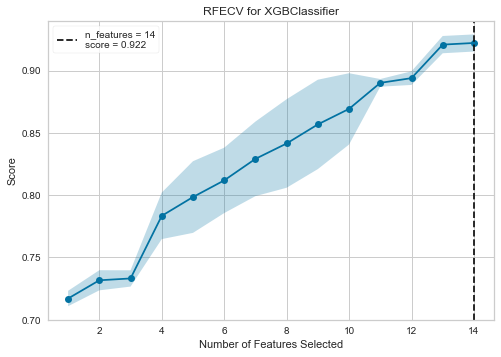

<AxesSubplot:title={'center':'RFECV for XGBClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [37]:
# 特征递归消减
visualizer = RFECV(model, cv=5, scoring='f1_weighted')
visualizer.fit(X_train, y_train)
visualizer.show()

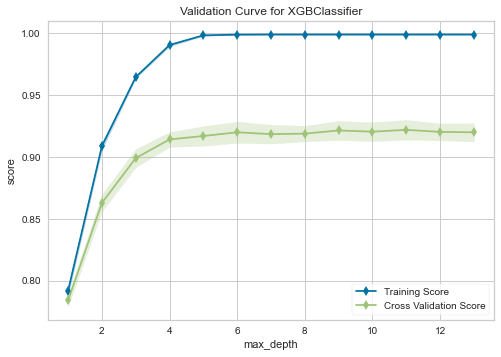

<AxesSubplot:title={'center':'Validation Curve for XGBClassifier'}, xlabel='max_depth', ylabel='score'>

In [38]:
#特征选择
visualizer = ValidationCurve(
    model, param_name="max_depth",
    param_range=np.arange(1, 14), cv=5, scoring="f1_weighted"
)
visualizer.fit(X_train, y_train)
visualizer.show()